In [126]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
plt.style.context('seaborn-talk')


import sys
sys.path.append('../../PySHEMSuite/')
import Py3SHEMSuite as pys
import postproc as post

import fileinput

import pandas

In [2]:
hdf_final = h5py.File('../output/benchmark_doubletcalc_final.h5')

In [4]:
hdf_final.keys()

<KeysViewHDF5 ['comp', 'delx', 'dely', 'delz', 'df', 'ec', 'head', 'itemp_bcd', 'kx', 'ky', 'kz', 'lc', 'lx', 'ly', 'lz', 'por', 'pres', 'q', 'qx', 'qy', 'qz', 'rc', 'rhof', 'temp', 'temp_bcd', 'uindex', 'visf', 'vx', 'vy', 'vz', 'x', 'y', 'z']>

In [5]:
x = hdf_final['x'][0,0,:]
y = hdf_final['y'][0,:,0]
temp = hdf_final['temp'][:,:,:]

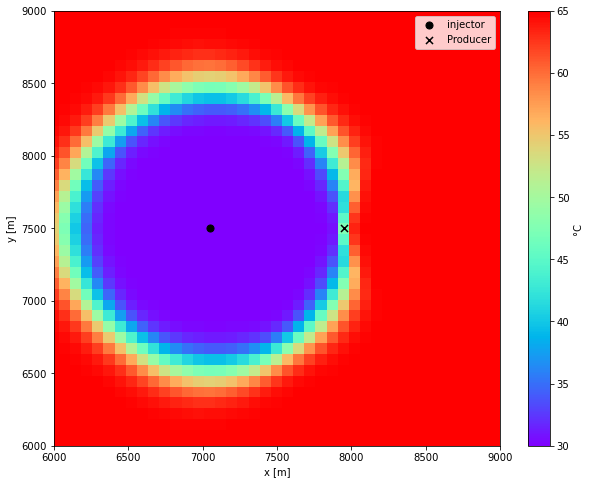

In [38]:
cellsize = 75

fig = plt.figure(figsize=(10,8))
cs = plt.pcolor(x,y,temp[0,:,:], cmap='rainbow')
plt.scatter(94*cellsize, 100*cellsize, s=50, marker='o', color='k', zorder=10, label='injector')
plt.scatter(106*cellsize, 100*cellsize, s=50, marker='x', color='k', label='Producer')
plt.colorbar(cs, label='°C')
plt.xlim([6000, 9000])
plt.ylim([6000, 9000])
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()

In [85]:
def dp():
    numerator = mu * (np.log(L/radius) + S)
    denominator = 2 * np.pi * kappa * H

    return Q * (numerator / denominator)

In [47]:
def read_monitor_as_dataframe(filename):
    """
    Routine to read the monitoring points of a transient SHEMAT-Suite simulation, returning an array of recorded
    values
    param filename: string: name of monitoring file
           varname: string or list of strings: name of variables to be loaded
    return: monitoring file: dataframe containing all information of the monitoring file
    """
    # replace any % comments with
    if sys.version_info.major == 2:
        print("Seems you still work with Python 2.7.")
        print("You should consider moving to Version 3.x")
        fid = fileinput.FileInput(filename, inplace=True, backup='.bak')
        for line in fid:
            print(line.replace('%', ''))
    elif sys.version_info.major == 3:
        with fileinput.FileInput(filename, inplace=True, backup='.bak') as fid:
            for line in fid:
                print(line.replace('%', ''))
    # load dataframe
    datframe = pandas.read_csv(filename, delim_whitespace=True)
    return datframe

In [51]:
mon = read_monitor_as_dataframe('../output/benchmark_doubletcalc_monitor.dat')

In [54]:
points = mon['x'].unique()

In [56]:
monitor_points = {}
for i, j in enumerate(points):
    monitor_points[i] = mon.query("x==@j")

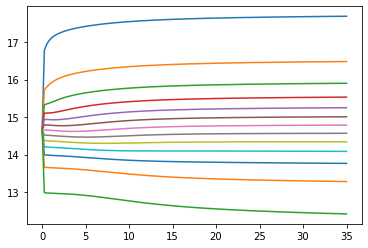

In [70]:
for i, j in enumerate(points):
    plt.plot(monitor_points[i]['time'], monitor_points[i]['pres'])

In [68]:
pres = hdf_final['pres'][:,:,:]

In [74]:
p_inj_prod = np.reshape(pres[:,99,93:106],(13,1))

In [125]:
plt.plot(x[93:106]-6000, p_inj_prod*10, '-o')
plt.ylim([100,190])
plt.xlim([500,2500])
plt.xlabel('x-coordinate')
plt.ylabel('pressure [bar]')

Text(0, 0.5, 'pressure [bar]')

In [87]:
img = plt.imread('doubletcalc_eclipse.PNG')

In [123]:
fig, axs = plt.subplots()
fig.set_size_inches(15,9)
#axs.imshow(img)
axs.plot(x[93:106]-6000, p_inj_prod*10)
axs.imshow(img, extent=[500, 2000, 100, 190])
axs.set_ylim([100,190])
axs.set_xlim([500,2250])
axs.set_xlabel('x-coordinate')
axs.set_ylabel('pressure [bar]')

Text(0, 0.5, 'pressure [bar]')